In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

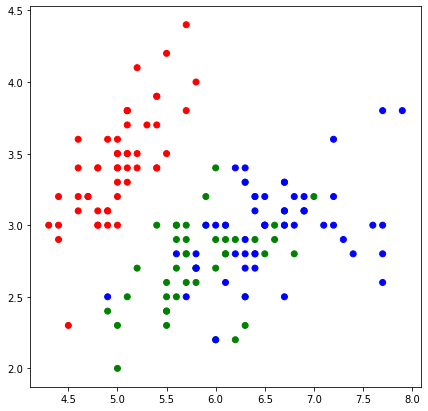

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.show()

In [5]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

def get_graph(X_train, y_train, k, knn_type, q = None):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    if q:
        Z = knn_type(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, q)
    else:
        Z = knn_type(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()
    
def accuracy(pred, y): return (sum(pred == y) / len(y))

### KNN 1

In [6]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

### KNN 2

In [7]:
def knn_w(x_train, y_train, x_test, k, q):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])

            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            # Найдем вес в зависимости от расстояния
            w = q**d[0]
            classes[d[1]] += w
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [8]:
for k in range(11):
    y_pred = knn(X_train, y_train, X_test, k)
    print(f'Точность KNN при k = {k}: {accuracy(y_pred, y_test):.3f}')
    y_pred = knn_w(X_train, y_train, X_test, k, q = 0.8)
    print(f'Точность KNN_W c  при k = {k}: {accuracy(y_pred, y_test):.3f}')
    print('*'*20)

Точность KNN при k = 0: 0.367
Точность KNN_W c  при k = 0: 0.367
********************
Точность KNN при k = 1: 0.700
Точность KNN_W c  при k = 1: 0.700
********************
Точность KNN при k = 2: 0.800
Точность KNN_W c  при k = 2: 0.800
********************
Точность KNN при k = 3: 0.767
Точность KNN_W c  при k = 3: 0.767
********************
Точность KNN при k = 4: 0.833
Точность KNN_W c  при k = 4: 0.800
********************
Точность KNN при k = 5: 0.800
Точность KNN_W c  при k = 5: 0.800
********************
Точность KNN при k = 6: 0.767
Точность KNN_W c  при k = 6: 0.833
********************
Точность KNN при k = 7: 0.733
Точность KNN_W c  при k = 7: 0.733
********************
Точность KNN при k = 8: 0.767
Точность KNN_W c  при k = 8: 0.833
********************
Точность KNN при k = 9: 0.800
Точность KNN_W c  при k = 9: 0.800
********************
Точность KNN при k = 10: 0.767
Точность KNN_W c  при k = 10: 0.833
********************


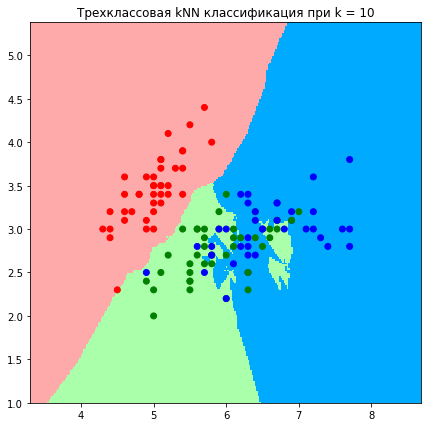

In [9]:
k = 10
get_graph(X_train, y_train, k, knn_type=knn)

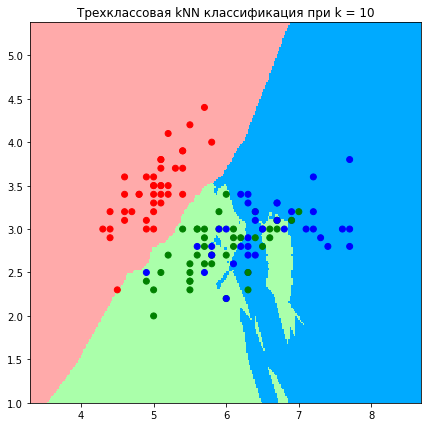

In [10]:
get_graph(X_train, y_train, k, knn_type=knn_w, q = 0.8)